# **Attrition in an Organization || Why Workers Quit?**
Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

1. Expensive in terms of both money and time to train new employees.
1. Loss of experienced employees
2. Impact in productivity
3. Impact profit

Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

# About Data
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

EnvironmentSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobInvolvement
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

PerformanceRating
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

RelationshipSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

WorkLifeBalance
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'




In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot
import warnings
warnings.filterwarnings('ignore')

In [79]:
df=pd.read_csv('/content/drive/MyDrive/Employee Attrition/dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis
* Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
  * Univariate analysis
      * Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
      * Categorical variable : Bar chart showing frequency in each category
  * Bivariate analysis
      * Continous & Continous : Scatter plots to know how continous variables interact with each other
      * Categorical & categorical : Stacked column chart to show how the frequencies are spread between two
      * categorical variables
      * Categorical & Continous : Boxplots, Swamplots or even bar charts
* Detect outliers
* Feature engineering

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [81]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [82]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

We notice that '`EmployeeCount`', '`Over18`', '`StandardHours`' have only one unique values and '`EmployeeNumber`' has `1470` unique values.
This features aren't useful for us, So we are going to drop those columns.

In [83]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

# Categorical Features

In [84]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representativ

In [85]:
len(object_col)

7

In [86]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

# Numerical Features

In [87]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [88]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


# Data Visualisation

In [89]:
import hvplot.pandas

In [90]:
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (Count)

In [91]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [Education]   (Count)

In [92]:
df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (Count)

In [93]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (Count)

In [94]:
df.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (Count)

In [95]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (Count)

In [96]:
df.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (Count)

In [97]:
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (Count)

In [98]:
df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (Count)

In [99]:
df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [StockOptionLevel]   (Count)

In [100]:
df.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (Count)

In [101]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)


:NdOverlay   [Attrition]
   :Histogram   [Age]   (Count)

In [102]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)


:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (Count)

In [103]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)


:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (Count)

In [104]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (Count)

***

## **Conclusions:**

***
- The workers with low `JobLevel`, `MonthlyIncome`, `YearAtCompany`, and `TotalWorkingYears` are more likely to quit there jobs.
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

***

<Axes: >

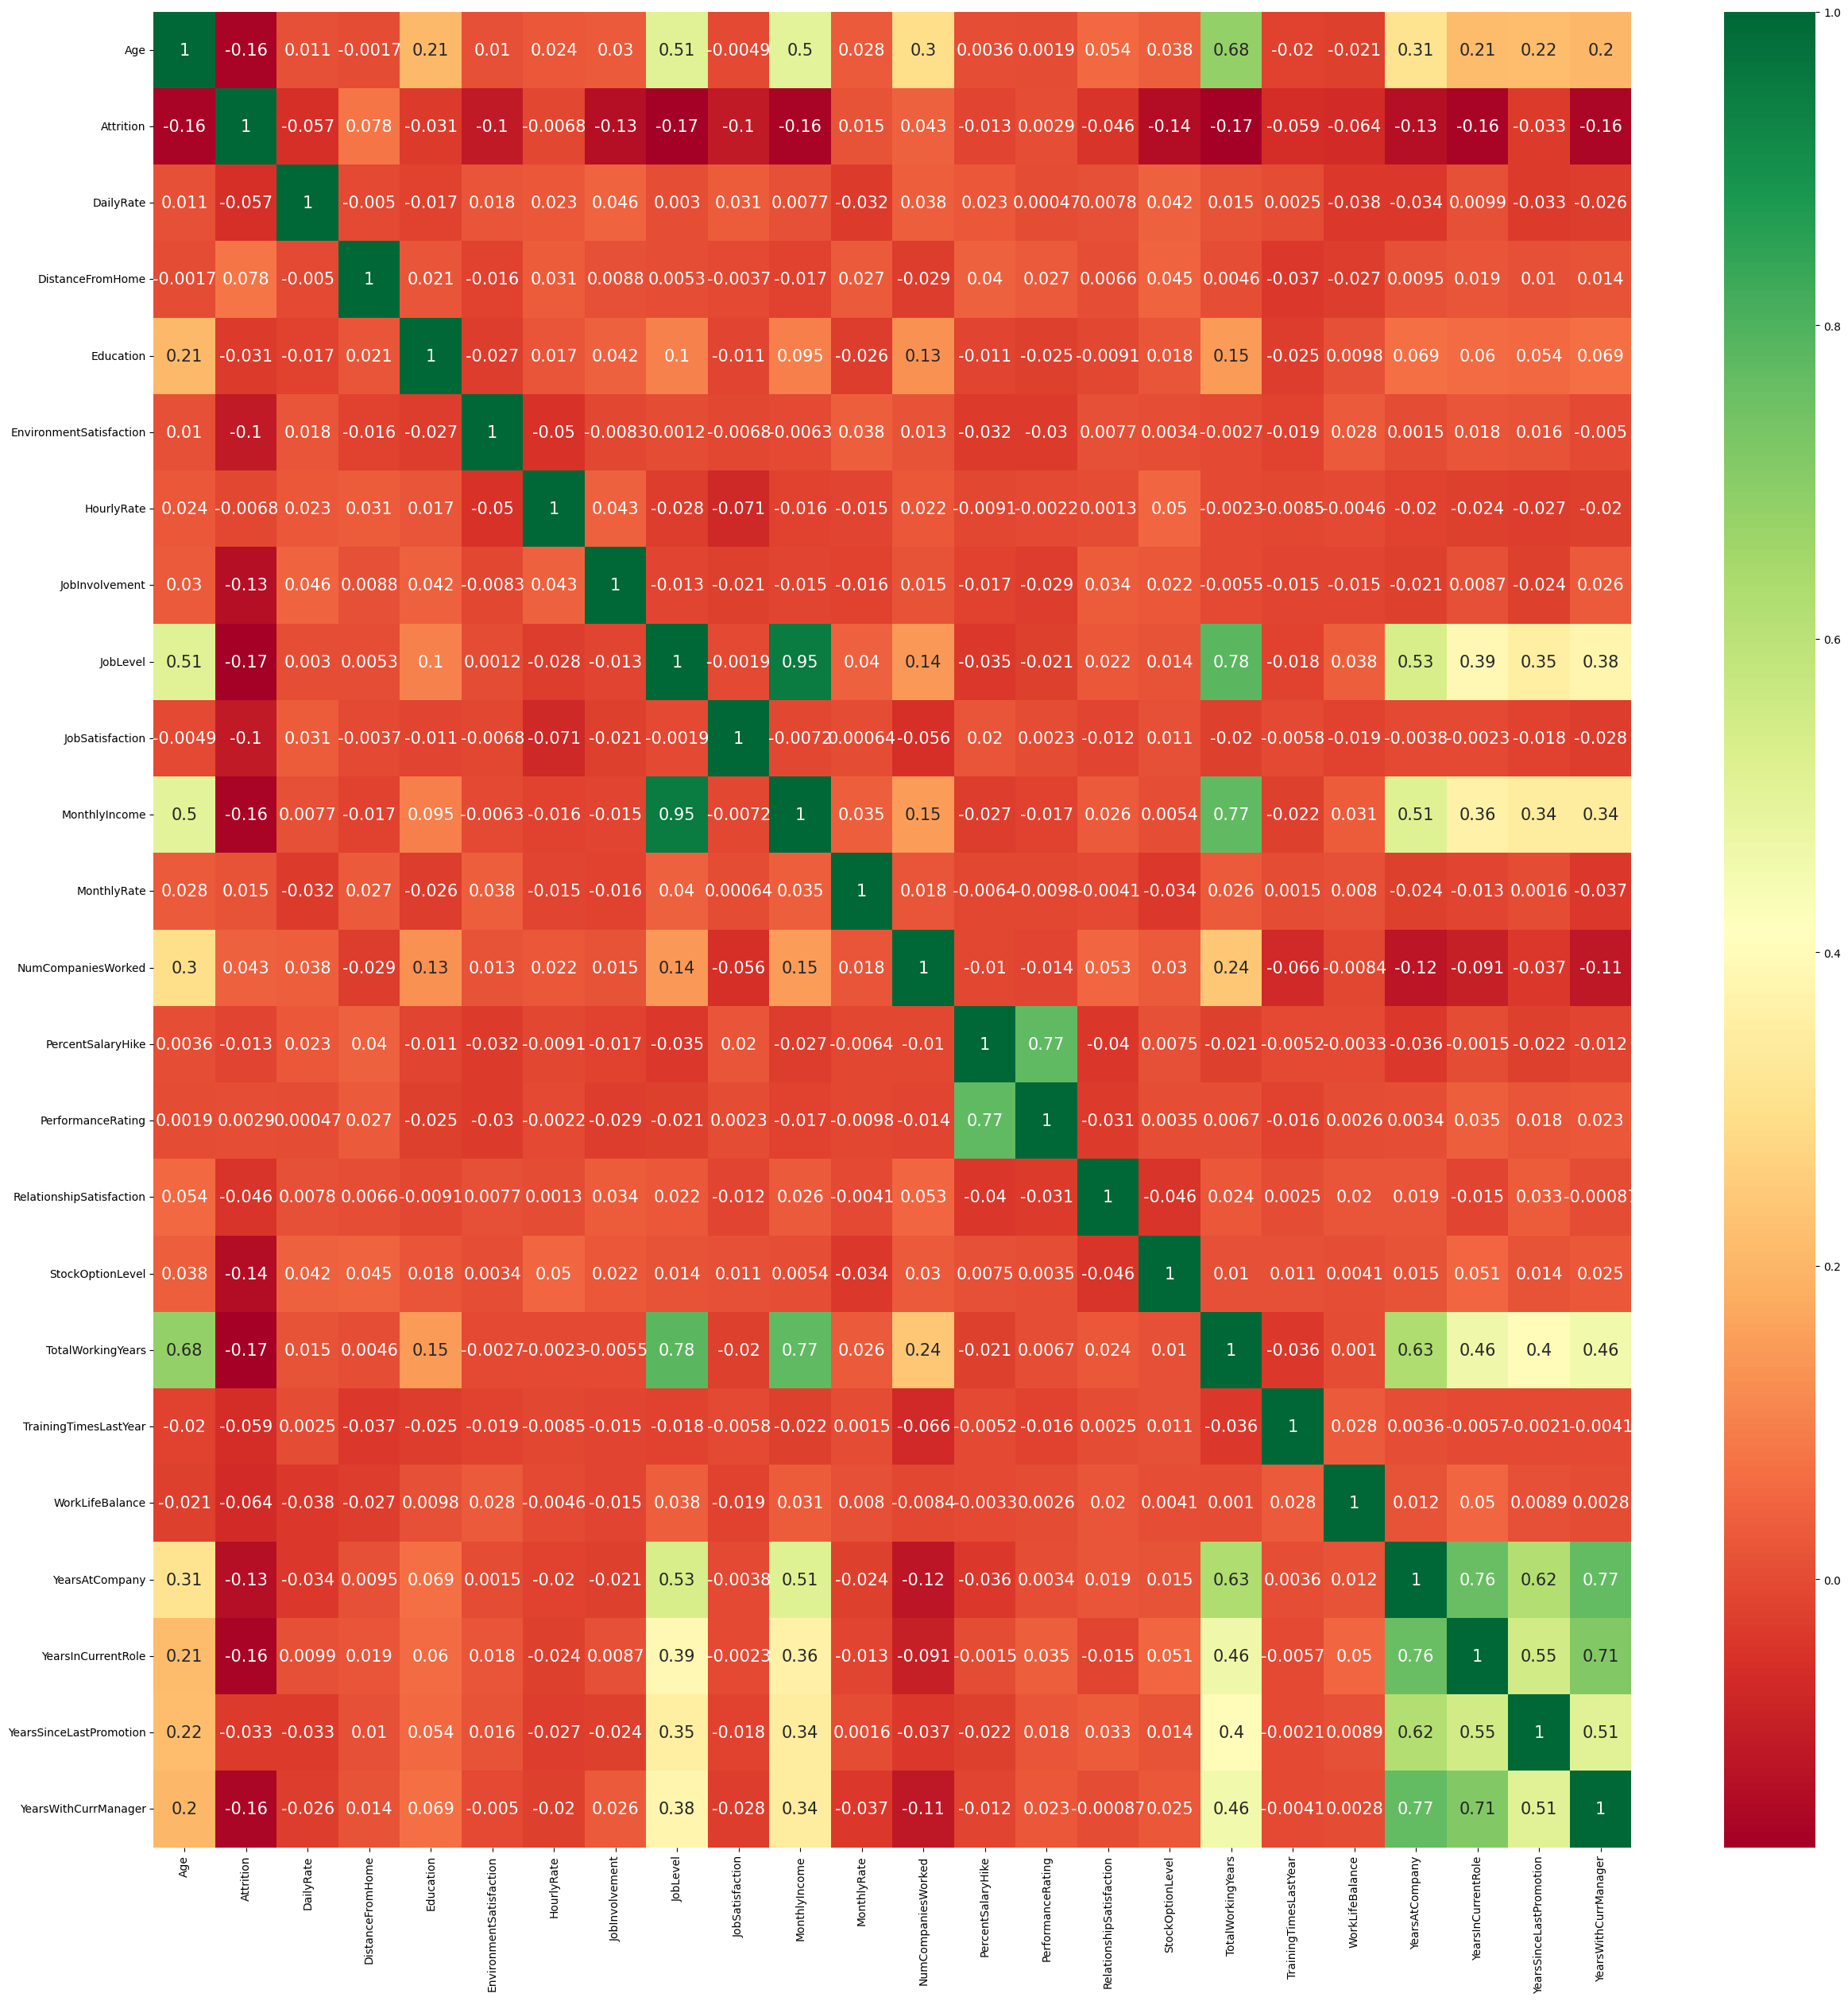

In [105]:
plt.figure(figsize=(30, 30))
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size": 15})

##  **Analysis of correlation results (sample analysis):**
- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.
- Marital status and stock option level are negatively correlated

# Data Processing


In [106]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [107]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


In [108]:
data.shape

(1470, 136)

# Model training


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Use the data DataFrame with dummy variables
X = data.drop('Attrition', axis=1)  # Changed from df to data
y = data['Attrition']  # Changed from df to data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(1176, 135) (294, 135)


In [110]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Logistic Regression

In [112]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[959  19]
 [ 96 102]]
ACCURACY SCORE:
0.9022
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.909005    0.842975  0.902211     0.875990      0.897888
recall       0.980573    0.515152  0.902211     0.747862      0.902211
f1-score     0.943433    0.639498  0.902211     0.791466      0.892261
support    978.000000  198.000000  0.902211  1176.000000   1176.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[236  19]
 [ 25  14]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.904215   0.424242   0.85034    0.664228      0.840545
recall       0.925490   0.358974   0.85034    0.642232      0.850340
f1-score     0.914729   0.388889   0.85034    0.651809      0.844974
support    255.000000  39.000000   0.85034  294.000000    294.000000


# Random forest

In [120]:
# # Random forest
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[978   0]
 [  0 198]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    978.0  198.0       1.0     1176.0        1176.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[253   2]
 [ 35   4]]
ACCURACY SCORE:
0.8741
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.878472   0.666667   0.87415    0.772569      0.850376
recall       0.992157   0.102564   0.87415    0.547360      0.874150
f1-score     0.931860   0.177778   0.87415    0.554819      0.831829
support    255.000000  39.000000   0.87415  294.000000    294.000000


(294, 135)
(294, 135, 2)


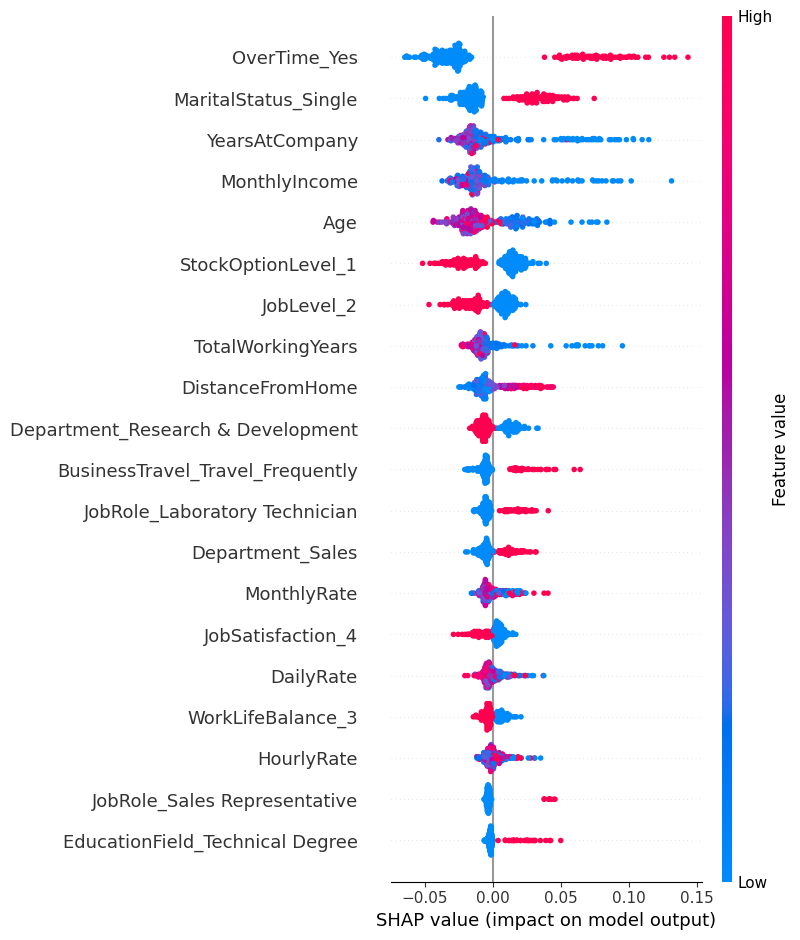

In [133]:
print(X_test.shape)

import shap
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test)
print(shap_values.shape)
# Use shap_values for class 1 (positive class)
shap_values_class1 = shap_values[:, :, 1]

# Now plot the summary
shap.summary_plot(shap_values_class1, X_test)




The SHAP summary plot visualizes the features' importance in predicting employee attrition (the positive class, in this case, likely representing employees who left the company).  Here's how to interpret it:

* **Feature Importance:** Features are ranked vertically by their overall impact on the model's predictions.  Features higher on the plot tend to be more influential in determining attrition.

* **SHAP Value Color:** The color of each point represents the SHAP value for that observation and feature.  A high positive SHAP value (red) means that a feature's value for that particular employee pushed the model's prediction of attrition *upward* (increased the likelihood of attrition). A high negative SHAP value (blue) means it pushed the prediction *downward* (decreased the likelihood of attrition).

* **Feature Effect:** The horizontal position of the dots shows how a feature's value affects the model output (attrition prediction).  For example, if a feature's dots are mostly on the right side and red, it means higher values of that feature generally lead to higher predictions of attrition.  Conversely, if a feature's dots are mostly on the left and blue, lower values of that feature generally predict higher attrition.

* **Specific Example:** If "OverTime_Yes" has mostly red dots on the right, it indicates that employees working overtime are significantly more likely to leave the company. Conversely, if "TotalWorkingYears" has mostly blue dots on the left, it means lower total working years is associated with higher likelihood of attrition.

**Key Insights**
Insights from the model interpretability using SHAP values reveal several key factors driving employee attrition. These include overtime, job role (especially Research Directors), monthly income, and tenure at the company. Employees who work overtime are more likely to leave, highlighting the need for improved work-life balance. Certain roles, such as Research Directors, seem to face specific challenges that impact retention. Additionally, lower monthly income is associated with higher attrition, emphasizing the importance of offering competitive compensation. Furthermore, newer employees tend to have higher attrition rates, pointing to the value of strong onboarding and mentorship programs. To address these issues, organizations can implement strategies such as monitoring and minimizing mandatory overtime, conducting regular salary reviews to ensure competitiveness, providing robust onboarding and mentorship for new hires, and offering career development opportunities to support continued growth and progression. By focusing on these areas, companies can potentially reduce attrition and retain valuable talent.




In [135]:
%cd

Cloning into 'Employee-Attrition'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
